# Original Solution for the moving mirror-field system

In [2]:
begin # Initial Packages
    using QuantumOptics
    using DelimitedFiles
    using PyPlot
    rc("text", usetex = true)
    using LaTeXStrings
    cd("..")
end


(.:60804): Gtk-WARNING **: 20:03:48.650: Theme parsing error: gtk.css:1649:16: '-gtk-icon-size' is not a valid property name

(.:60804): Gtk-WARNING **: 20:03:48.650: Theme parsing error: gtk.css:1652:16: '-gtk-icon-size' is not a valid property name


In [80]:
begin # Hilbert space dimensions
    global fdim = 30
    global mdim = 30

    fbasis = FockBasis(fdim)
    mbasis = FockBasis(mdim)
end;

In [81]:
begin # Operators
    # field
    idf = identityoperator(fbasis)
    af = destroy(fbasis)
    nf = number(fbasis)

    # mirror
    idm = identityoperator(fbasis)
    am = destroy(mbasis)
    nm = number(fbasis)
end;

In [155]:
begin # Initial states for the field α and the mirror β
    α = 2im
    β = 1 + 2im
    
    ψ₀ = coherentstate(mbasis, β) ⊗ coherentstate(fbasis, α) 

    tlist = LinRange(0, 20, 500); # Time of evaluation
end;

In [156]:
# Original Hamiltonian

H(χ, ν, ω) = ω * nf ⊗ idm + ν * idf ⊗ nm + χ * nf ⊗ (dagger(am) + am);

In [157]:
begin# Diagonalized Hamiltonian
    # Composite displace operator
    D(χ, ν) = exp(tensor(((χ/ν) * dense(dagger(am)) - conj(χ/ν) * dense(am)), dense(nf)))

    # Diagonal Hamiltonian
    HD(χ, ν, ω) = dagger(D(χ, ν)) * ( ω * tensor(nm, idf) + ν * tensor(nf, idm) - (χ/ν)^2 * tensor(idm, nm^2)) * D(χ, ν)
end;

In [158]:
# Solution using Schrödinger equation

tout, ψₜ = timeevolution.schroedinger(tlist, ψ₀, HD(0.7, 0.9, 1));

In [159]:
begin # Expectation values
    N_mean = real(expect(nm ⊗ idf, ψₜ))
    Q_mean = real(expect((am + dagger(am)) ⊗ idf, ψₜ))
end;

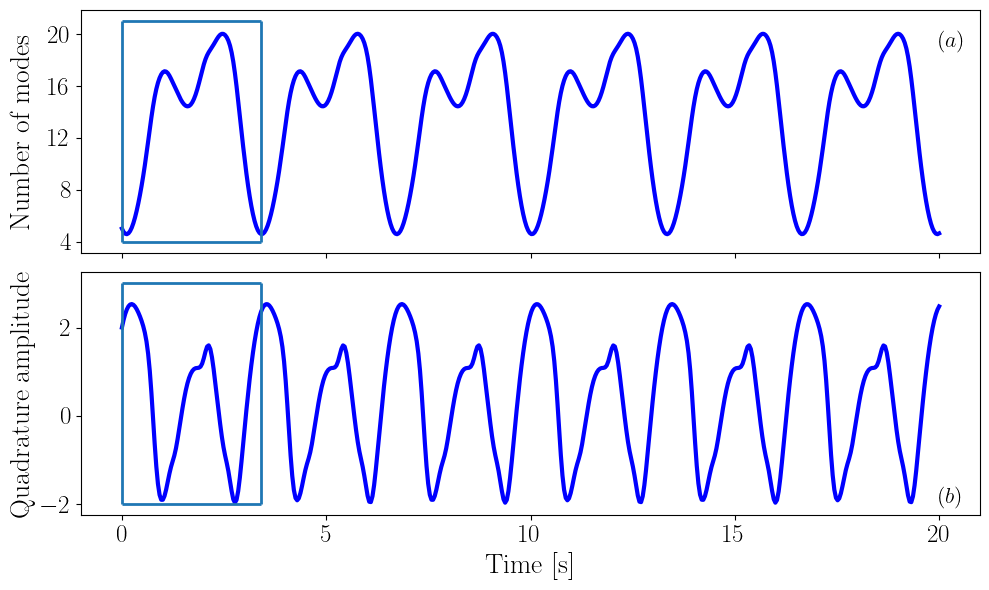

In [164]:
begin
    nqm_fig, (ax1, ax2) = plt.subplots(2, sharex = true, figsize = (10, 6))

    ax1.plot(tlist, N_mean, "b", lw = 3)
    ax2.plot(tlist, Q_mean, "b", lw = 3)

    #nqm_fig.suptitle(L"\textrm{Mirror-field interaction evolution}", fontsize = 20)

    ax1.set_ylabel(L"\textrm{Number of modes}", fontsize = 20, labelpad = 10)
        setp(ax1.get_xticklabels(), fontsize = 18)
        setp(ax1.get_yticklabels(), fontsize = 18)
        ax1.set_yticks([4, 8, 12, 16, 20])
        ax1.text(20, 19, L"(a)", fontsize = 16)
        ax1.vlines([0, 3.4], 4, 21, lw = 2)
        ax1.hlines(4, 0, 3.4, lw = 2)
        ax1.hlines(21, 0, 3.4, lw = 2)
    ax2.set_xlabel(L"\textrm{Time [s]}", fontsize = 20)
    ax2.set_ylabel(L"\textrm{Quadrature amplitude}", fontsize = 20)
        setp(ax2.get_xticklabels(), fontsize = 18)
        setp(ax2.get_yticklabels(), fontsize = 18)
        ax2.set_yticks([-2, 0, 2])
        ax2.set_xticks([0, 5, 10, 15, 20])
        ax2.text(20, -2, L"(b)", fontsize=16)
        ax2.vlines([0, 3.4], -2, 3, lw = 2)
        ax2.hlines(-2, 0, 3.4, lw = 2)
        ax2.hlines(3, 0, 3.4, lw = 2)

    tight_layout()

    savefig("figures/schrsol.png", dpi = 300, transparent = false)
    savefig("figures/schrsol.pdf", dpi = 300, transparent = false)

    gcf()
end

In [165]:
close("all")